# WeatherPy

*All below analysis completed February 2 - 7, 2021.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Base url and query info for weather API
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#Create lists to hold weather information
cloudiness = []
country = []
date = []
humidity = []
max_temp = []
wind_speed = []
cities_reordered = []
lat = []
long = []

#Set counters starting value
index_counter = 0
city_counter = 1

print("Query for data has started.")

# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        #Retreiving data and converting to a JSON
        response = requests.get(query_url + city).json()
        
        #Add values for each city to corresponding list about weather
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        cities_reordered.append(response["name"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        
        #Group cities in sets of 50
        if index_counter > 49:
            index_counter = 0
            city_counter = city_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {city_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

        
print("Query for data has started.")

Query for data has started.
Processing Record 1 of Set 1 : punta arenas
Processing Record 2 of Set 1 : pozo colorado
Processing Record 3 of Set 1 : georgetown
Processing Record 4 of Set 1 : adrar
Processing Record 5 of Set 1 : atuona
Processing Record 6 of Set 1 : iskateley
Processing Record 7 of Set 1 : talnakh
Processing Record 8 of Set 1 : kaeo
Processing Record 9 of Set 1 : victoria
Processing Record 10 of Set 1 : mataura
Processing Record 11 of Set 1 : cape town
Processing Record 12 of Set 1 : inhambane
Processing Record 13 of Set 1 : rikitea
Processing Record 14 of Set 1 : port alfred
Processing Record 15 of Set 1 : kuminskiy
Processing Record 16 of Set 1 : yellowknife
City not found. Skipping...
Processing Record 17 of Set 1 : berlevag
Processing Record 18 of Set 1 : westport
Processing Record 19 of Set 1 : busselton
Processing Record 20 of Set 1 : filadelfia
Processing Record 21 of Set 1 : jales
Processing Record 22 of Set 1 : saint-philippe
Processing Record 23 of Set 1 : ushu

Processing Record 35 of Set 4 : trairi
Processing Record 36 of Set 4 : provideniya
Processing Record 37 of Set 4 : castro
Processing Record 38 of Set 4 : lafiagi
Processing Record 39 of Set 4 : ola
Processing Record 40 of Set 4 : upernavik
Processing Record 41 of Set 4 : vilhena
Processing Record 42 of Set 4 : monte azul
Processing Record 43 of Set 4 : iqaluit
Processing Record 44 of Set 4 : sitka
Processing Record 45 of Set 4 : green river
Processing Record 46 of Set 4 : bereda
Processing Record 47 of Set 4 : sabancuy
Processing Record 48 of Set 4 : krasnoselkup
Processing Record 49 of Set 4 : barra do bugres
Processing Record 50 of Set 4 : nouadhibou
Processing Record 0 of Set 5 : hammerfest
Processing Record 1 of Set 5 : arlit
Processing Record 2 of Set 5 : eslamshahr
Processing Record 3 of Set 5 : sturgis
City not found. Skipping...
Processing Record 4 of Set 5 : jumla
Processing Record 5 of Set 5 : northam
Processing Record 6 of Set 5 : fier
Processing Record 7 of Set 5 : saint-ge

Processing Record 22 of Set 8 : shelburne
Processing Record 23 of Set 8 : pangnirtung
Processing Record 24 of Set 8 : bud
Processing Record 25 of Set 8 : salalah
Processing Record 26 of Set 8 : morros
Processing Record 27 of Set 8 : camden
Processing Record 28 of Set 8 : ribeira grande
Processing Record 29 of Set 8 : port hedland
Processing Record 30 of Set 8 : dunedin
Processing Record 31 of Set 8 : coquimbo
Processing Record 32 of Set 8 : lucea
Processing Record 33 of Set 8 : narrabri
Processing Record 34 of Set 8 : chicama
Processing Record 35 of Set 8 : mount gambier
Processing Record 36 of Set 8 : puro
Processing Record 37 of Set 8 : nago
Processing Record 38 of Set 8 : tambun
Processing Record 39 of Set 8 : peniche
Processing Record 40 of Set 8 : capreol
Processing Record 41 of Set 8 : nome
City not found. Skipping...
Processing Record 42 of Set 8 : carutapera
City not found. Skipping...
Processing Record 43 of Set 8 : baykit
Processing Record 44 of Set 8 : assiniboia
Processing 

Processing Record 3 of Set 12 : port blair
Processing Record 4 of Set 12 : providencia
Processing Record 5 of Set 12 : adre
Processing Record 6 of Set 12 : sagua de tanamo
City not found. Skipping...
Processing Record 7 of Set 12 : chapais
Processing Record 8 of Set 12 : nuuk
Processing Record 9 of Set 12 : solnechnyy
Processing Record 10 of Set 12 : lukovetskiy
Query for data has started.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Create a DataFrame from Weather Data pulled
weather = pd.DataFrame({"City" : cities_reordered,
                "Country" : country,
                "Date" : date,
                "Lat" : lat,
                "Lng" : long,
                "Cloudiness" : cloudiness,
                "Humidity" : humidity,
                "Max Temp" : max_temp,
                "Wind Speed" : wind_speed})
#Display DataFrame
weather

,City,Country,Date,Lat,Lng,Cloudiness,Humidity,Max Temp,Wind Speed
0,Punta Arenas,CL,1612723302,-53.1500,-70.9167,0,23,69.80,12.66
1,Pozo Colorado,PY,1612724005,-23.4923,-58.7972,0,22,93.76,4.16
2,George Town,MY,1612723872,5.4112,100.3354,20,83,80.60,3.49
3,Adrar,MR,1612724005,20.5022,-10.0711,0,29,63.12,8.61
4,Atuona,PF,1612724005,-9.8000,-139.0333,23,75,79.41,21.63
...,...,...,...,...,...,...,...,...,...
566,Sagua de Tánamo,CU,1612724081,20.5819,-75.2414,73,63,83.25,5.46
567,Chapais,CA,1612724081,49.7834,-74.8492,90,79,15.80,10.36
568,Nuuk,GL,1612723850,64.1835,-51.7216,0,40,33.80,6.91
569,Solnechnyy,RU,1612723497,50.7214,136.6319,100,90,0.48,3.65


In [5]:
#Export Weather DataFrame to a CSV
weather.to_csv("output_data/cities_weather.csv", index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

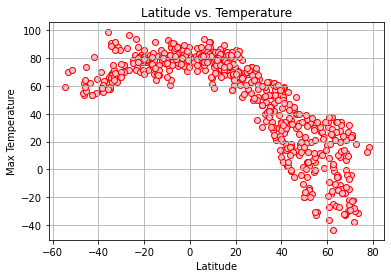

In [7]:
#Create a scatter plot of latitude vs. max temp
plt.scatter(weather["Lat"], weather["Max Temp"], facecolor="pink", edgecolor="red" )
#Add grid
plt.grid()
#Set titles, x and y labels
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
#Save PNG of plot
plt.savefig("output_data/Latitude vs Temperature Plot.png")
#Display scatter plot
plt.show()

The above plot demonstrates the Latitude values around the equator plotted against the Max Temperature for that location. This plot shows that as you approach a Latitude of 0 (the equator) the temperature increase and then decreases the further from you get from the equator.

## Latitude vs. Humidity Plot

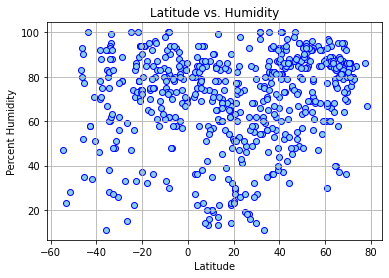

In [8]:
#Create a scatter plot of latitude vs. humidity
plt.scatter(weather["Lat"], weather["Humidity"], facecolor="skyblue", edgecolor="blue" )
#Add grid
plt.grid()
#Set titles, x and y labels
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Percent Humidity")
#Save PNG of plot
plt.savefig("output_data/Latitude vs Humidity Plot.png")
#Display scatter plot
plt.show()

The above plot demonstrates the Latitude values around the equator plotted against the Humidity for that location. This plot shows that there isn't a visible change in Humidity as you get closer to the equator.

## Latitude vs. Cloudiness Plot

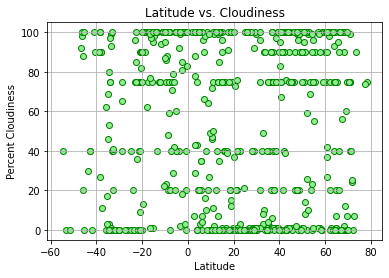

In [9]:
#Create a scatter plot of latitude vs. cloudiness
plt.scatter(weather["Lat"], weather["Cloudiness"], facecolor="lightgreen", edgecolor="green")
#Add grid
plt.grid()
#Set titles, x and y labels
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Percent Cloudiness")
#Save PNG of plot
plt.savefig("output_data/Latitude vs Cloudiness Plot.png")
#Display scatter plot
plt.show()

The above plot demonstrates the Latitude values around the equator plotted against the Cloudiness for that location. This plot shows that there isn't a visible change in cloudiness as you get closer to the equator.

## Latitude vs. Wind Speed Plot

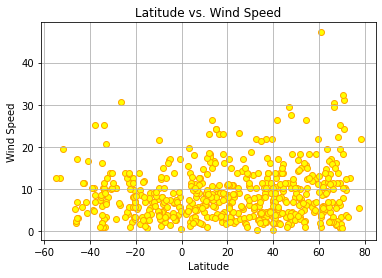

In [10]:
#Create a scatter plot of latitude vs. wind speed
plt.scatter(weather["Lat"], weather["Wind Speed"], facecolor="yellow", edgecolor="orange")
#Add grid
plt.grid()
#Set titles, x and y labels
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
#Save PNG of plot
plt.savefig("output_data/Latitude vs Wind Speed Plot.png")
#Display scatter plot
plt.show()

The above plot demonstrates the Latitude values around the equator plotted against the Wind Speed for that location. This plot shows that there isn't a visible change in Wind Speed as you get closer to the equator.

## Linear Regression

In [12]:
#Split Weather DataFrame into Northern & Southern Hemispheres
north = weather.loc[weather["Lat"] >= 0]
south = weather.loc[weather["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7620130555821204


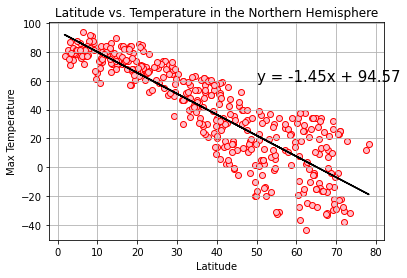

In [13]:
#Create a linear regressions & scatter plot for the northern hemisphere (lat >=0) 
#for the max temp vs latitude
x_values = north["Lat"]
y_values = north["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot the scatter plot and linear regression
plt.scatter(x_values, y_values, facecolor="pink", edgecolor="red")
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(50, 60),fontsize=15,color="black")
#Add grid
plt.grid()
#Set titles, x and y labels
plt.title("Latitude vs. Temperature in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
#Print the r-squared value
print(f"The r-squared is: {rvalue**2}")
#Save PNG of plot
plt.savefig("output_data/Latitude vs Temperature - Northern Hemisphere.png")
#Display scatter plot
plt.show()

This chart shows the scatter plot, linear regression and r-squared value for the relationship between the Latitude and the Max Temperature in the Northern Hemisphere. This data is fairly heavily correlated, as demonstrated by the r-value of 0.73. This means that you can use closeness to the equator from the northern hemisphere as an indicator of how hot it might be on this given day.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.31613237381976744


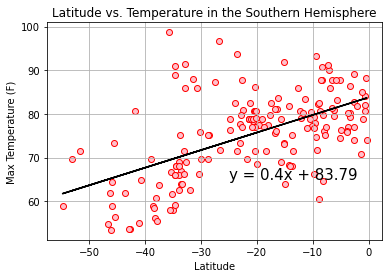

In [14]:
#Create a linear regressions & scatter plot for the southern hemisphere (lat <0)
#for the max temp vs latitude
x_values = south["Lat"]
y_values = south["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot the scatter plot and linear regression
plt.scatter(x_values, y_values, facecolor="pink", edgecolor="red")
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(-25, 65),fontsize=15,color="black")
#Add grid
plt.grid()
#Set titles, x and y labels
plt.title("Latitude vs. Temperature in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
#Print the r-squared value
print(f"The r-squared is: {rvalue**2}")
#Save PNG of plot
plt.savefig("output_data/Latitude vs Temperature - Southern Hemisphere.png")
#Display scatter plot
plt.show()

This chart shows the scatter plot, linear regression and r-squared value for the relationship between the Latitude and the Max Temperature in the Southern Hemisphere. This data isn't heavily correlated, as demonstrated by the r-value of 0.346. This means that when in the Southern Hemisphere it is more difficult to use the proximity to the equator as an indicator of heat.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1140134261904844


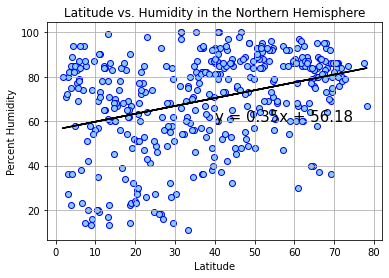

In [15]:
#Create a linear regressions & scatter plot for the northern hemisphere (lat >=0)
#for the humidity vs latitude
x_values = north["Lat"]
y_values = north["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot the scatter plot and linear regression
plt.scatter(x_values, y_values, facecolor="skyblue", edgecolor="blue")
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(40, 60),fontsize=15,color="black")
#Add grid
plt.grid()
#Set titles, x and y labels
plt.title("Latitude vs. Humidity in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Percent Humidity")
#Print the r-squared value
print(f"The r-squared is: {rvalue**2}")
#Save PNG of plot
plt.savefig("output_data/Latitude vs Humidity - Northern Hemisphere.png")
#Display scatter plot
plt.show()

This chart shows the scatter plot, linear regression and r-squared value for the relationship between the Latitude and the Humiddity in the Northern Hemisphere. This data isn't heavily correlated, as demonstrated by the r-value of 0.137. This means that proximity to the equator from the Northern Hemisphere does not help in predicting the humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.044088265046936886


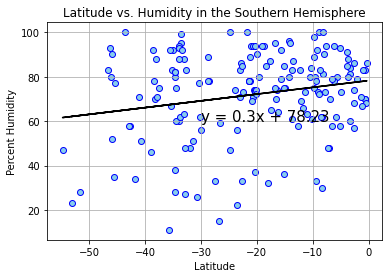

In [16]:
#Create a linear regressions & scatter plot for the northern hemisphere (lat >=0)
#for the humidity vs latitude
x_values = south["Lat"]
y_values = south["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot the scatter plot and linear regression
plt.scatter(x_values, y_values, facecolor="skyblue", edgecolor="blue")
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(-30, 60),fontsize=15,color="black")
#Add grid
plt.grid()
#Set titles, x and y labels
plt.title("Latitude vs. Humidity in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Percent Humidity")
#Print the r-squared value
print(f"The r-squared is: {rvalue**2}")
#Save PNG of plot
plt.savefig("output_data/Latitude vs Humidity - Southern Hemisphere.png")
#Display scatter plot
plt.show()

This chart shows the scatter plot, linear regression and r-squared value for the relationship between the Latitude and the Humiddity in the Southern Hemisphere. This data isn't heavily correlated, as demonstrated by the r-value of 0.04. This means that proximity to the equator from the Southern Hemisphere does not help in predicting the humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.011877183405203273


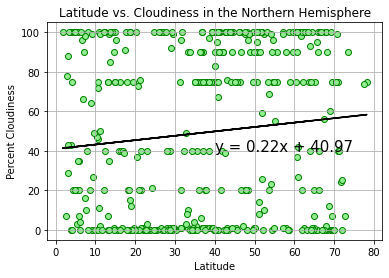

In [17]:
#Create a linear regressions & scatter plot for the northern hemisphere (lat >=0)
#for the cloudiness vs latitude
x_values = north["Lat"]
y_values = north["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot the scatter plot and linear regression
plt.scatter(x_values, y_values, facecolor="lightgreen", edgecolor="green")
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(40, 40),fontsize=15,color="black")
#Add grid
plt.grid()
#Set titles, x and y labels
plt.title("Latitude vs. Cloudiness in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Percent Cloudiness")
#Print the r-squared value
print(f"The r-squared is: {rvalue**2}")
#Save PNG of plot
plt.savefig("output_data/Latitude vs Cloudiness - Northern Hemisphere.png")
#Display scatter plot
plt.show()

This chart shows the scatter plot, linear regression and r-squared value for the relationship between the Latitude and the Cloudiness in the Northern Hemisphere. This data isn't heavily correlated, as demonstrated by the r-value of 0.045. This means that proximity to the equator from the Northern Hemisphere does not help in predicting the cloudiness on a given day.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06952409434399857


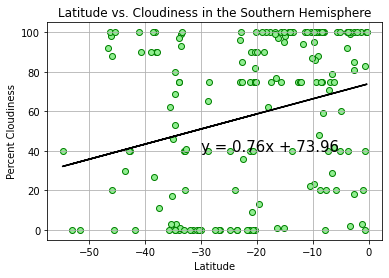

In [18]:
#Create a linear regressions & scatter plot for the northern hemisphere (lat >=0)
#for the cloudiness vs latitude
x_values = south["Lat"]
y_values = south["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot the scatter plot and linear regression
plt.scatter(x_values, y_values, facecolor="lightgreen", edgecolor="green")
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(-30, 40),fontsize=15,color="black")
#Add grid
plt.grid()
#Set titles, x and y labels
plt.title("Latitude vs. Cloudiness in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Percent Cloudiness")
#Print the r-squared value
print(f"The r-squared is: {rvalue**2}")
#Save PNG of plot
plt.savefig("output_data/Latitude vs Cloudiness - Southern Hemisphere.png")
#Display scatter plot
plt.show()

This chart shows the scatter plot, linear regression and r-squared value for the relationship between the Latitude and the Cloudiness in the Southern Hemisphere. This data isn't heavily correlated, as demonstrated by the r-value of 0.04. This means that proximity to the equator from the Southern Hemisphere does not help in predicting the cloudiness on a given day.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.008366625740365395


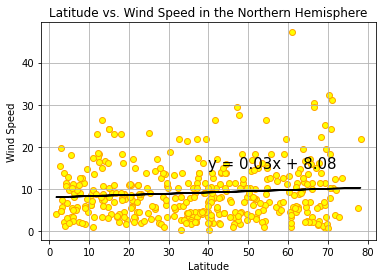

In [19]:
#Create a linear regressions & scatter plot for the northern hemisphere (lat >=0)
#for the wind speed vs latitude
x_values = north["Lat"]
y_values = north["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot the scatter plot and linear regression
plt.scatter(x_values, y_values, facecolor="yellow", edgecolor="orange")
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(40, 15),fontsize=15,color="black")
#Add grid
plt.grid()
#Set titles, x and y labels
plt.title("Latitude vs. Wind Speed in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
#Print the r-squared value
print(f"The r-squared is: {rvalue**2}")
#Save PNG of plot
plt.savefig("output_data/Latitude vs Wind Speed - Northern Hemisphere.png")
#Display scatter plot
plt.show()

This chart shows the scatter plot, linear regression and r-squared value for the relationship between the Latitude and the Wind Speed in the Northern Hemisphere. This data isn't heavily correlated, as demonstrated by the r-value of 0.03. This means that proximity to the equator from the Northern Hemisphere does not help in predicting the wind speed on a given day.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.028688820666920654


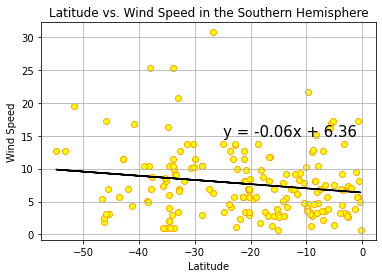

In [20]:
#Create a linear regressions & scatter plot for the northern hemisphere (lat >=0)
#for the wind speed vs latitude
x_values = south["Lat"]
y_values = south["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot the scatter plot and linear regression
plt.scatter(x_values, y_values, facecolor="yellow", edgecolor="orange")
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(-25, 15),fontsize=15,color="black")
#Add grid
plt.grid()
#Set titles, x and y labels
plt.title("Latitude vs. Wind Speed in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
#Print the r-squared value
print(f"The r-squared is: {rvalue**2}")
#Save PNG of plot
plt.savefig("output_data/Latitude vs Wind Speed - Southern Hemisphere.png")
#Display scatter plot
plt.show()

This chart shows the scatter plot, linear regression and r-squared value for the relationship between the Latitude and the Wind Speed in the Southern Hemisphere. This data isn't heavily correlated, as demonstrated by the r-value of 0.03. This means that proximity to the equator from the Southern Hemisphere does not help in predicting the wind speed on a given day.

# Trends & Analysis

*The biggest correlation between latitude and weather is with Temperature. As you approach the equator from the north there is a heavy correlation and the temperature becomes observably hotter as your approach the equator. It is less correlated from the Southern Hemisphere. This makes sense as this analysis was done in February 2021 and the Southern Hemisphere is in it's summer months during this time.


*There is no usable correlation between any of the other weather measurements.